In [1]:
import os, sys
root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)

In [2]:
from e_nose import file_reader 
from e_nose import data_processing as dp
from e_nose import data_visualization
from e_nose.measurements import Measurement, StandardizationType
from e_nose.online_reader import OnlineReader, FileAsOnlineReader
import numpy as np

%reload_ext autoreload
%autoreload 2

In [3]:
data_tuple = file_reader.read_all_files_in_folder('../data/newgen-test')
functionalisations, working_channels, all_data = data_tuple
data = next(iter(all_data.values()))

Reading file ../data/newgen-test/data_coffee_powder_orange_juice_isopropanol_raisin_red_Wine_wodka_10_loops_for_5.0_min_referenceTime_30.0_min_2020-2-28_7_57.csv
using sensor 5 specification
Read 1 files


In [4]:
reader = FileAsOnlineReader(5, data, StandardizationType.LOWPASS_FILTER)

using sensor 5 specification


In [5]:
measurements = reader.get_all_measurements_every(10, 100)

100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270


17070
17080
17090
17100
17110
17120
17130
17140
17150
17160
17170
17180
17190
17200
17210
17220
17230
17240
17250
17260
17270
17280
17290
17300
17310
17320
17330
17340
17350
17360
17370
17380
17390
17400
17410
17420
17430
17440
17450
17460
17470
17480
17490
17500
17510
17520
17530
17540
17550
17560
17570
17580
17590
17600
17610
17620
17630
17640
17650
17660
17670
17680
17690
17700
17710
17720
17730
17740
17750
17760
17770
17780
17790
17800
17810
17820
17830
17840
17850
17860
17870
17880
17890
17900
17910
17920
17930
17940
17950
17960
17970
17980
17990
18000
18010
18020
18030
18040
18050
18060
18070
18080
18090
18100
18110
18120
18130
18140
18150
18160
18170
18180
18190
18200
18210
18220
18230
18240
18250
18260
18270
18280
18290
18300
18310
18320
18330
18340
18350
18360
18370
18380
18390
18400
18410
18420
18430
18440
18450
18460
18470
18480
18490
18500
18510
18520
18530
18540
18550
18560
18570
18580
18590
18600
18610
18620
18630
18640
18650
18660
18670
18680
18690
18700
18710
18720
1873

32130
32140
32150
32160
32170
32180
32190
32200
32210
32220
32230
32240
32250
32260
32270
32280
32290
32300
32310
32320
32330
32340
32350
32360
32370
32380
32390
32400
32410
32420
32430
32440
32450
32460
32470
32480
32490
32500
32510
32520
32530
32540
32550
32560
32570
32580
32590
32600
32610
32620
32630
32640
32650
32660
32670
32680
32690
32700
32710
32720
32730
32740
32750
32760
32770
32780
32790
32800
32810
32820
32830
32840
32850
32860
32870
32880
32890
32900
32910
32920
32930
32940
32950
32960
32970
32980
32990
33000
33010
33020
33030
33040
33050
33060
33070
33080
33090
33100
33110
33120
33130
33140
33150
33160
33170
33180
33190
33200
33210
33220
33230
33240
33250
33260
33270
33280
33290
33300
33310
33320
33330
33340
33350
33360
33370
33380
33390
33400
33410
33420
33430
33440
33450
33460
33470
33480
33490
33500
33510
33520
33530
33540
33550
33560
33570
33580
33590
33600
33610
33620
33630
33640
33650
33660
33670
33680
33690
33700
33710
33720
33730
33740
33750
33760
33770
33780
3379

47720
47730
47740
47750
47760
47770
47780
47790
47800
47810
47820
47830
47840
47850
47860
47870
47880
47890
47900
47910
47920
47930
47940
47950
47960
47970
47980
47990
48000
48010
48020
48030
48040
48050
48060
48070
48080
48090
48100
48110
48120
48130
48140
48150
48160
48170
48180
48190
48200
48210
48220
48230
48240
48250
48260
48270
48280
48290
48300
48310
48320
48330
48340
48350
48360
48370
48380
48390
48400
48410
48420
48430
48440
48450
48460
48470
48480
48490
48500
48510
48520
48530
48540
48550
48560
48570
48580
48590
48600
48610
48620
48630
48640
48650
48660
48670
48680
48690
48700
48710
48720
48730
48740
48750
48760
48770
48780
48790
48800
48810
48820
48830
48840
48850
48860
48870
48880
48890
48900
48910
48920
48930
48940
48950
48960
48970
48980
48990
49000
49010
49020
49030
49040
49050
49060
49070
49080
49090
49100
49110
49120
49130
49140
49150
49160
49170
49180
49190
49200
49210
49220
49230
49240
49250
49260
49270
49280
49290
49300
49310
49320
49330
49340
49350
49360
49370
4938

63980
63990
64000
64010
64020
64030
64040
64050
64060
64070
64080
64090
64100
64110
64120
64130
64140
64150
64160
64170
64180
64190
64200
64210
64220
64230
64240
64250
64260
64270
64280
64290
64300
64310
64320
64330
64340
64350
64360
64370
64380
64390
64400
64410
64420
64430
64440
64450
64460
64470
64480
64490
64500
64510
64520
64530
64540
64550
64560
64570
64580
64590
64600
64610
64620
64630
64640
64650
64660
64670
64680
64690
64700
64710
64720
64730
64740
64750
64760
64770
64780
64790
64800
64810
64820
64830
64840
64850
64860
64870
64880
64890
64900
64910
64920
64930
64940
64950
64960
64970
64980
64990
65000
65010
65020
65030
65040
65050
65060
65070
65080
65090
65100
65110
65120
65130
65140
65150
65160
65170
65180
65190
65200
65210
65220
65230
65240
65250
65260
65270
65280
65290
65300
65310
65320
65330
65340
65350
65360
65370
65380
65390
65400
65410
65420
65430
65440
65450
65460
65470
65480
65490
65500
65510
65520
65530
65540
65550
65560
65570
65580
65590
65600
65610
65620
65630
6564

0: ref


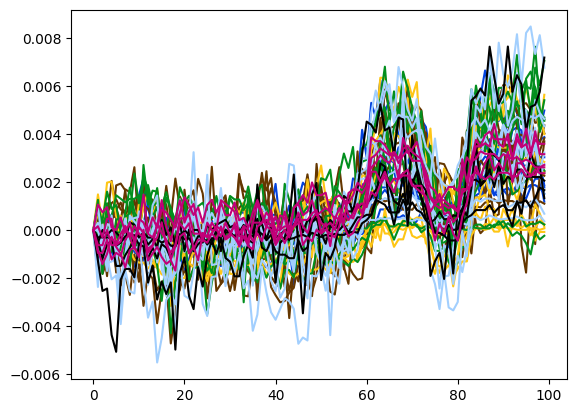

1: ref


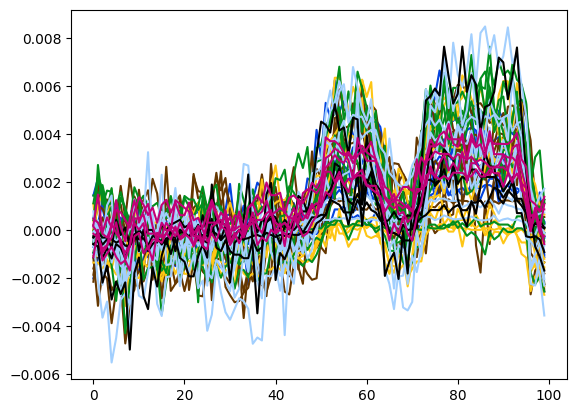

2: ref


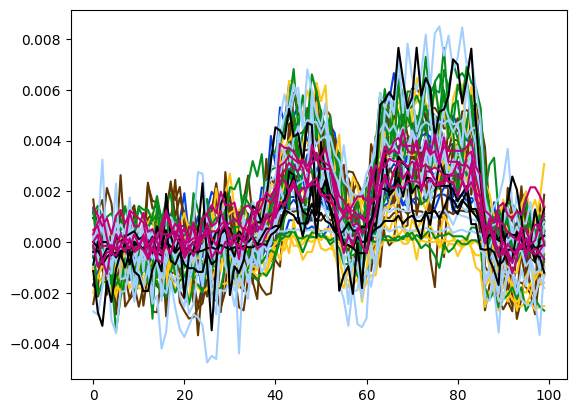

3: ref


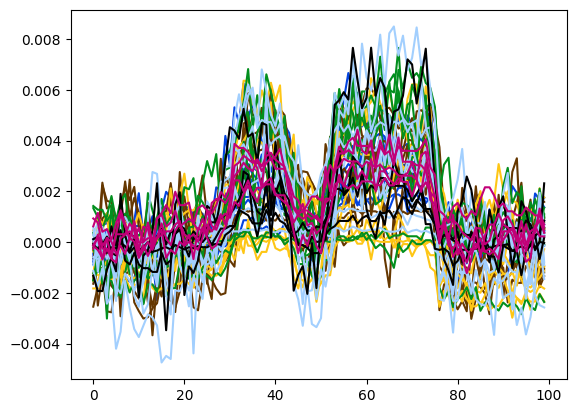

4: ref


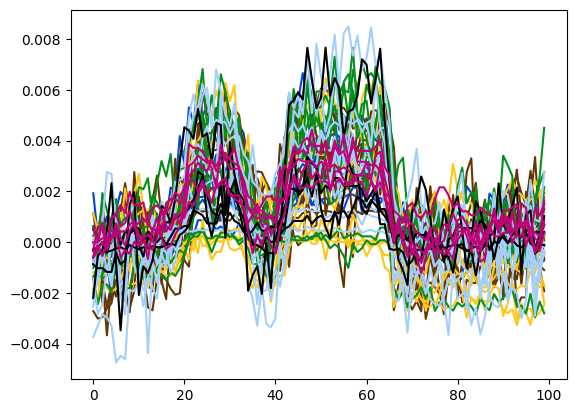

5: ref


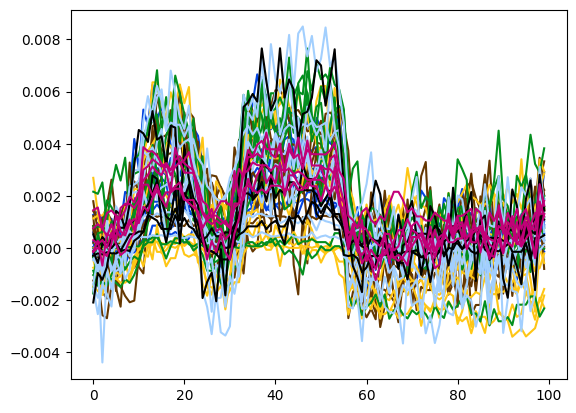

6: ref


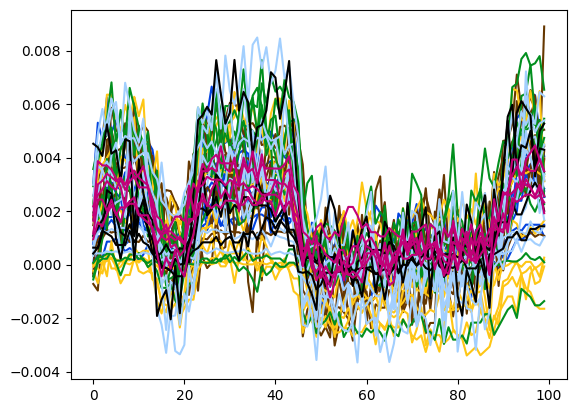

7: ref


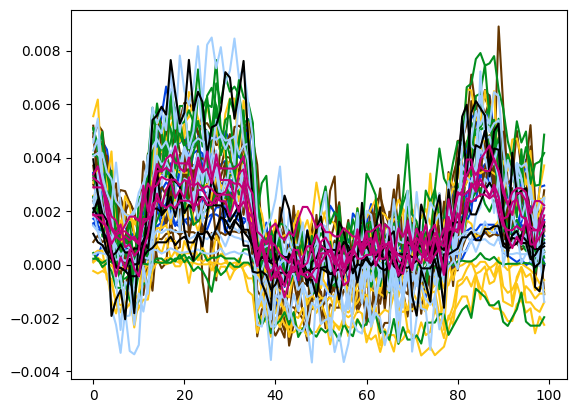

8: ref


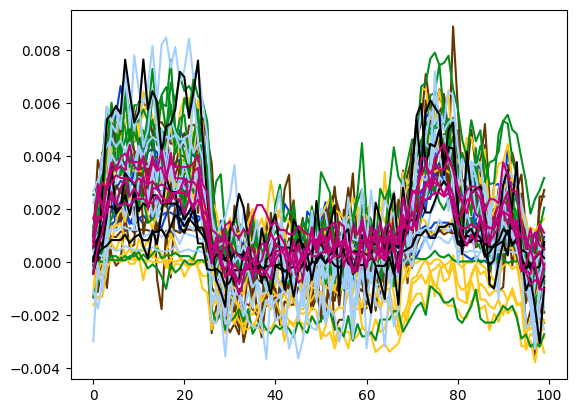

9: ref


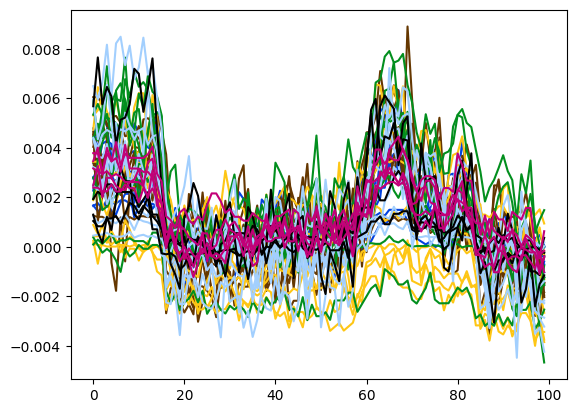

10: ref


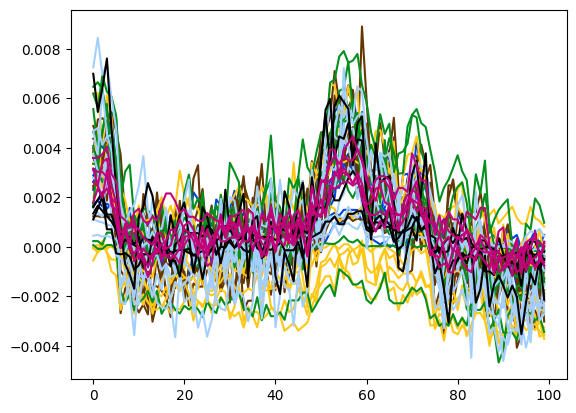

11: ref


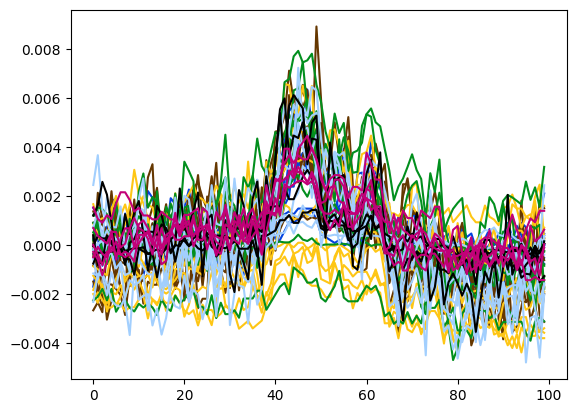

12: ref


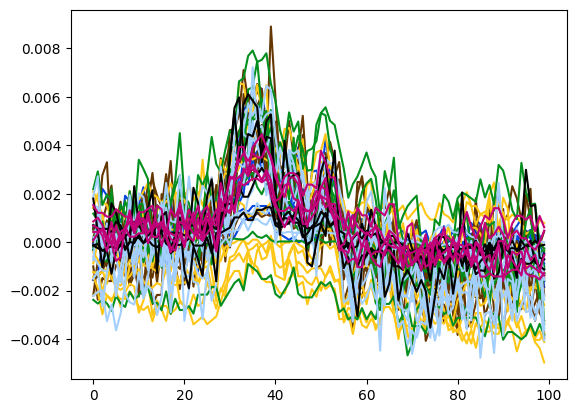

13: ref


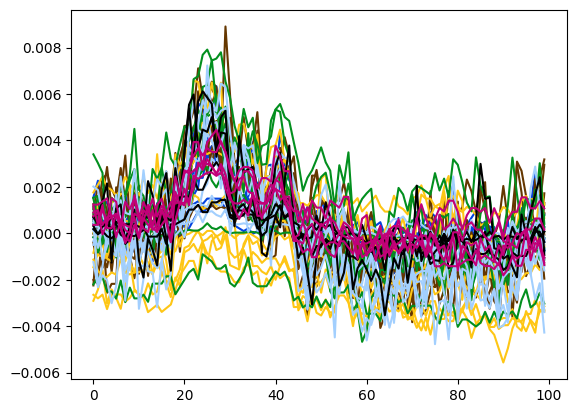

In [ ]:
for i, m in enumerate(measurements):
    print("%i: %s" % (i,m.label))
    data_visualization.draw_meas_channel_over_time(m, functionalisations)